# Lab_5
## Вариант задания: Регрессия на 7 факторах. Эффект мультиколлинеарности создают две пары факторов. Разброса в масштабах факторов нет

#### 1. В соответствии с вариантом задания сгенерировать экспериментальные данные, в которых в явном виде присутствует эффект мультиколлинеарности.
#### 2. Рассчитать ряд показателей, характеризующих эффект мультиколлинеарности. Определить факторы, ответственные за возникновение эффекта мультиколлинеарности.
#### 3. Построить ридж-оценки параметров при различных значениях параметра регуляризации. Выбрать оптимальное значение параметра регуляризации. Построить графики изменения квадрата евклидовой нормы оценок параметров и остаточной суммы квадратов от параметра регуляризации.
#### 4. Провести оценивание модели регрессии по методу главных компонентов. Перейти к описанию в исходном пространстве факторов. Сравнить решение с ридж-оцениванием по смещению оценок и точности предсказания отклика. 

## 1. В соответствии с вариантом задания сгенерировать экспериментальные данные, в которых в явном виде присутствует эффект мультиколлинеарности.

#### Регрессия на 7 факторах. Эффект мультиколлинеарности создают две пары факторов. Разброса в масштабах факторов нет;

In [1]:
# teta_i = 1 для каждого регрессора
# x1, x2, x3, x4, x5, x1 + x2 * 0.01, x3 + x4 * 0.3
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

countN = 120

def getEta(X):
    u = np.empty(countN)
    for i in range(countN):
        u[i] = np.sum(X[i, :])
    return u
    
def getX():
    # Генерация данных
    x1 = np.empty(countN)
    x2 = np.empty(countN)
    x3 = np.empty(countN)
    x4 = np.empty(countN)
    x5 = np.empty(countN)
    
    for i in range(countN):
        x1[i] = (rnd.random()-0.5) * 6
        x2[i] = (rnd.random()-0.5) * 6
        x3[i] = (rnd.random()-0.5) * 6
        x4[i] = (rnd.random()-0.5) * 6
        x5[i] = (rnd.random()-0.5) * 6
    
    X = np.array([np.ones(len(x1)), x1, x2, x3, x4, x5, 0.1*x1 + x2, x1 + 0.1*x2])
    X = np.matrix(X)
    return X

## 2. Рассчитать ряд показателей, характеризующих эффект мультиколлинеарности. Определить факторы, ответственные за возникновение эффекта мультиколлинеарности.

#### 1) Определитель информационной матрицы.

In [2]:
X = getX()
print('Определитель матрицы = %7f' % np.linalg.det(X.T*X))

Определитель матрицы = -0.000000


#### 2) Минимальное собственное число матрицы XtX.

In [3]:
eigvalues, eigvectors = np.linalg.eig((X.T).dot(X))
print('Минимальное собственное число =', min(abs(eigvalues)))

Минимальное собственное число = 1.6102421162111675e-15


#### 3) Мера обусловленности матрицы по Нейману-Голдстейну.

In [4]:
maxEig = max(eigvalues)
minEig = min(eigvalues)
print('Мера обусловленности по Нейману-Голдстейну =', abs(maxEig/minEig))

Мера обусловленности по Нейману-Голдстейну = 1.0450288330890318e+16


#### 4) Максимальная парная сопряженность.

In [5]:
R = np.empty((8, 8))
for i in range(8):
  for j in range(8):
    if i == j: 
      R[i][j] = 1
    else: 
      u, v = np.squeeze(np.asarray(X[i,:])), np.squeeze(np.asarray(X[j,:]))
      R[i][j] = np.dot(u, v) / (np.sum(u**2)**(1/2) * np.sum(v**2)**(1/2))

max_value = -1000
for i in range(8):
    for j in range(i):
        if abs(R[i, j]) > max_value:
            max_value = abs(R[i, j])

R = np.matrix(R)
print("Максимальная парная сопряженность =", max_value)

Максимальная парная сопряженность = 0.9951496110368568


#### 5) Максимальная сопряженность.

In [6]:
# Фиксируем независимую x1
import math
diag_Rsinv = np.diagonal(np.linalg.inv(R.conjugate()))
Ri_2 = 1 - 1 / diag_Rsinv
Ri_abs = abs(Ri_2**(1/2))
print(max(Ri_abs))

1.0


## 3. Построить ридж-оценки параметров при различных значениях параметра регуляризации. Выбрать оптимальное значение параметра регуляризации. Построить графики изменения квадрата евклидовой нормы оценок параметров и остаточной суммы квадратов от параметра регуляризации.

##### Для нахождения оптимального параметра регуляризации необходимо построить графики изменения квадрата евклидовой нормы оценок параметров и остаточной суммы квадратов от параметра регуляризации. Параметр 𝝀 будет определятся как некоторый компромисс между неизбежным увеличением остаточной  суммы квадратов и желаемым уменьшением евклидовой нормы оценок параметров.

In [7]:
def getRidjTheta(X, y, lam):
    L = np.diag(lam * np.diag(X.T*X))
    return np.array(np.dot(np.linalg.inv(X.T*X + L) * X.T, y))[0]

def calcRss(X, y, th):
    return np.sum(np.array(y - np.dot(X, th)) ** 2)

def getUarray(X):
    u = []
    for i in range(len(X)):
        u.append(np.sum(X[i, :]))
    u = np.array(u)
    return u
    
def getYarray(u, p = 0.05):
    y = np.empty(len(u))
    
    w2 = np.dot(u - u.mean(), u - u.mean()) / (len(u - 1))  
    sig = p * (w2)**0.5
    for i in range(len(u)):
        y[i] = u[i] + np.random.normal(0, sig)
    return y

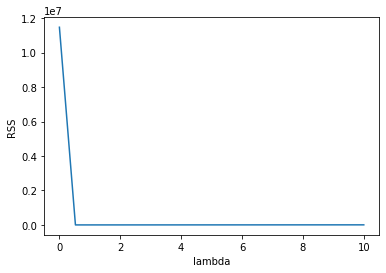

In [8]:
# RSS
lamb = np.linspace(0, 10, 20)
y = getYarray(getUarray(X))
rss_arr = [calcRss(X, y, getRidjTheta(X, y, l_)) for l_ in lamb]
ax = plt.axes()
ax.set_xlabel("lambda")
ax.set_ylabel("RSS")
ax.plot(lamb, rss_arr)

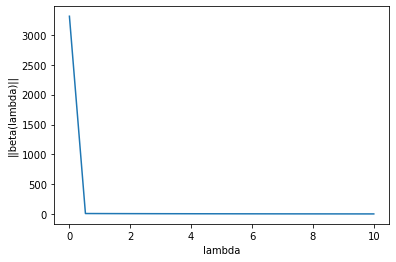

In [9]:
# beta
ax1 = plt.axes()
ax1.set_xlabel("lambda")
ax1.set_ylabel("||beta(lambda)||")
beta_s = [(np.sum(getRidjTheta(X, y, l_)**2))**(1/2) for l_ in lamb]
ax1.plot(lamb, beta_s)